In [ ]:
import numpy as np
from tensorflow import keras
print (keras.__version__)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

2.5.0


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train_new, y_train_new = x_train[(y_train==0) | (y_train==1)], y_train[(y_train==0) | (y_train==1)]

In [ ]:
x_train_final = x_train_new.reshape((-1, 784))

In [ ]:
x_test_new, y_test_new = x_test[(y_test==0) | (y_test==1)], y_test[(y_test==0) | (y_test==1)]

In [ ]:
x_test_final = x_test_new.reshape((-1, 784))

In [ ]:
x_train_final = x_train_final / 255
x_test_final = x_test_final / 255

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(784,), activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
model.fit(
  x=x_train_final,
  y=y_train_new,
  shuffle=True,
  epochs=5,
  batch_size=16
)

Epoch 1/5
792/792 [==============================] - 2s 1ms/step - loss: 0.1589 - binary_accuracy: 0.9728
Epoch 2/5
792/792 [==============================] - 1s 1ms/step - loss: 0.0233 - binary_accuracy: 0.9969
Epoch 3/5
792/792 [==============================] - 1s 1ms/step - loss: 0.0173 - binary_accuracy: 0.9968
Epoch 4/5
792/792 [==============================] - 1s 1ms/step - loss: 0.0130 - binary_accuracy: 0.9977
Epoch 5/5
792/792 [==============================] - 1s 1ms/step - loss: 0.0108 - binary_accuracy: 0.9978


In [ ]:
eval = model.evaluate(x=x_test_final, y=y_test_new)

67/67 [==============================] - 0s 1ms/step - loss: 0.0066 - binary_accuracy: 0.9991


In [ ]:
model.save(r'./logisticRegressionKeras.hdf5')

In [ ]:
import numpy as np
from tensorflow import keras
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

In [ ]:
model = keras.models.load_model(r'./logisticRegressionKeras.hdf5')

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_new, y_test_new = x_test[(y_test==0) | (y_test==1)], y_test[(y_test==0) | (y_test==1)]

x_test_final = x_test_new.reshape((-1, 784)) / 255

eval = model.evaluate(x=x_test_final, y=y_test_new)

67/67 [==============================] - 0s 971us/step - loss: 0.0066 - binary_accuracy: 0.9991


In [ ]:
eval

[0.006557471584528685, 0.9990543723106384]

In [ ]:
def convert_image(file):
  image = np.array(Image.open(file).convert('L'))
  return np.abs(((image / 255) - 1)*(-1))

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
def convert_image(file):
  image = np.array(Image.open(file).convert('L'))
  return np.abs(((image / 255) - 1)*(-1))

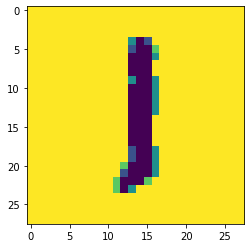

In [ ]:
im = convert_image(r'train_14.bmp')
imshow(im)

In [ ]:
predict_input = im.reshape((-1,784))
prediction = model.predict(predict_input)
print(prediction.shape)

(1, 1)
